In [2]:
%load_ext autoreload
%autoreload 2

In [255]:
import jax
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt

from typing import NamedTuple
from functools import partial
import math
import json

In [565]:
import xylo
import xylo.types as t
import xylo.cut
import xylo.slicer as s
import xylo.database
import xylo.sweep as xs
import xylo.audio as xaudio

In [712]:
note = 77

In [713]:
db = xylo.database.get()
bar = db.get_bar(note)
best = db.get_best(note)
spline = jnp.array(best['coeff'])
with open(f"data/gcode/{note}.json", 'w') as f:
  json.dump(best, f)
print(spline)

[1.         0.91562065 0.84399765 0.79444386 0.22986253]


In [714]:
# spline = [0.8618183457492242, 0.10249491254184383, 0.6796106365369823, 0.6894492655492203, 0.3909279734013816, 0.7317539174703496]
# spline = jnp.array([ 0.81393585, -0.00699588,  0.63882503,  0.65606331,  0.37536516, 0.79187227])
# spline = jnp.array([0.5, 0.3, 0.5, 1.0])

# sections = xylo.cut.spline(bar, spline)
sections = [xylo.cut.spline(bar, xylo.cut.spline_scale(spline, i)) for i in jnp.arange(0.2, 1.01, 0.2)]
# sections2 = xylo.cut.spline(bar, xylo.cut.spline_scale(spline, 0.5))

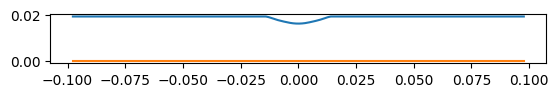

In [715]:
sections[-1].plot()

In [719]:
prev = None
i = 1
# for ss in sections:
#   o = s.slicer8.outline(bar, ss)
#   s.slicer8.path_topdown(bar, o, prev, cut_width = 4).write(f'data/gcode/topdown-{note}-{i}.ngc')
#   prev = o
#   i = i + 1

# s.slicer8.path_topdown(bar, s.slicer8.outline(bar, sections[-1]), None, cut_width = 1.0, x_init = 37.1, cut_y_centre = 0.5).write(f'data/gcode/topdown-{note}-full.ngc')
s.slicer8.path_topdown(bar, s.slicer8.outline(bar, sections[-1]), None, cut_width = 4).write(f'data/gcode/topdown-{note}-full.ngc')

In [717]:
wood = db.get_wood(note)
print(wood)
for ss in sections:
    swp = xs.sweep(wood, bar, ss, t.sweep_default)
    print(i, swp.harmonics, swp.harmonics / swp.harmonics[0])

Wood(rho=1088.9041714475686, E=30848000000.0, G=1606666666.6666667, nu=8.6)
1 [2404.44979116 5571.63447257 8546.05492835] [1.         2.31721806 3.55426633]
1 [2361.73133477 5691.39945003 8423.22696755] [1.         2.40984204 3.56654749]
1 [2317.93431548 5821.03671713 8327.54649314] [1.         2.51130357 3.59265853]
1 [2273.11554855 5961.03495698 8258.24470921] [1.         2.62240737 3.633007  ]
1 [2227.31252052 6111.59821379 8213.30136594] [1.         2.74393385 3.68753881]


[  59.8 2421.6] [0.02684575 1.08711832]
{'peak_heights': array([0.03514874, 0.11137611]), 'prominences': array([0.03513007, 0.11137513]), 'left_bases': array([22, 22]), 'right_bases': array([ 1385, 38318])}


/Users/amos/proj/xylo/xgit/py/xylo/audio.py:44: RuntimeWarning: invalid value encountered in cast
  i32 = fs.astype('int32')


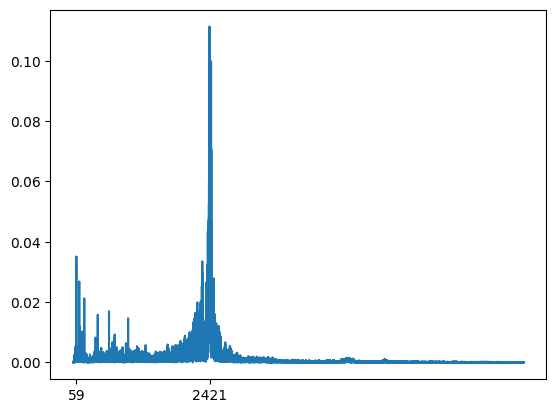

In [718]:
import xylo.tuning


vs = xaudio.read_samples(5.0)
xaudio.plot_spectrum(vs, height = 0.02, distance = 1000, prominence = 0.02, comparison_freq = xylo.tuning.yamaha_YX500R.note_to_freq(note))
xaudio.write_wave(f'tb-{note}', vs)

[ 200.   437.2  637.2  849.6 1095.4 1298.6 1700.8 1999.  2203.2 2518.
 2880.8 3149.  3442.8 3656.4 3980.4] [0.30199997 0.66017193 0.96217189 1.28289586 1.65405382 1.96088579
 2.56820772 3.01848967 3.32683164 3.80217958 4.35000752 4.75498948
 5.19862743 5.5211634  6.01040334]
{'peak_heights': array([0.10125101, 0.01668516, 0.0268276 , 0.15139054, 0.01492318,
       0.00600201, 0.006632  , 0.00418095, 0.01333768, 0.00392881,
       0.00576671, 0.00432216, 0.00403594, 0.00728277, 0.01646734]), 'prominences': array([0.10123046, 0.01665219, 0.0266468 , 0.15138883, 0.014827  ,
       0.00593561, 0.00659647, 0.00414008, 0.0133214 , 0.00386084,
       0.00573884, 0.00421148, 0.00393207, 0.00720249, 0.01645937]), 'left_bases': array([    0,  1323,  1323,     0,  5451,  6386,  7938,  9771,  7938,
       12065, 11686, 14947, 16182, 11686, 11686]), 'right_bases': array([ 1323,  2245,  3387, 37998, 11686,  7938,  9771, 10455, 11686,
       12661, 16182, 16182, 17356, 18632, 37998])}


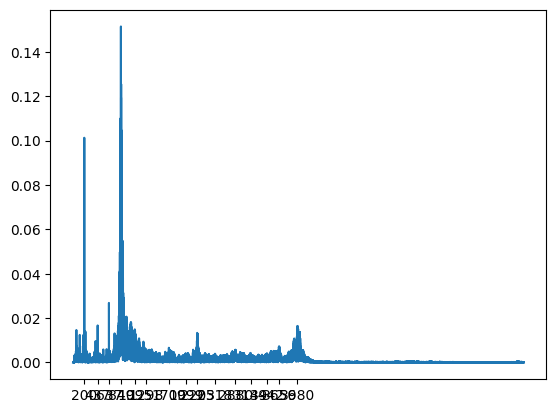

In [614]:
xaudio.plot_spectrum(vs, height = 0.002, distance = 1000, prominence = 0.002, comparison_freq = xylo.tuning.yamaha_YX500R.note_to_freq(note))